<a href="https://colab.research.google.com/github/shaunak-dave/Parkinson-Disease-Prediction/blob/main/Copy_of_Soft_Parkinson(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
print(os.listdir("/content/gdrive/MyDrive/spiral"))

['training', 'testing']


In [ ]:
directory='/content/gdrive/MyDrive/spiral/training'
category=['healthy','parkinson']
spiral_train_data=[]
spiral_train_labels= [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    spiral_train_data.append(imgarr)
    spiral_train_labels.append(label)



directory='/content/gdrive/MyDrive/spiral/testing'
category=['healthy','parkinson']
spiral_test_data=[]
spiral_test_labels = [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    spiral_test_data.append(imgarr)
    spiral_test_labels.append(label)

In [ ]:
directory='/content/gdrive/MyDrive/wave/training'
category=['healthy','parkinson']
wave_train_data=[]
wave_train_labels = [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    wave_train_data.append(imgarr)
    wave_train_labels.append(label)



directory='/content/gdrive/MyDrive/wave/testing'
category=['healthy','parkinson']
wave_test_data=[]
wave_test_labels = [] 
for i in category:
  folder=os.path.join(directory,i)
  label=category.index(i)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    imgarr=cv2.imread(img_path)
    imgarr=cv2.resize(imgarr,(128,128))
    wave_test_data.append(imgarr)
    wave_test_labels.append(label)

In [ ]:
spiral_test_data=np.array(spiral_test_data)
spiral_test_labels=np.array(spiral_test_labels)
spiral_train_data=np.array(spiral_train_data)
spiral_train_labels=np.array(spiral_train_labels)

wave_test_data=np.array(wave_test_data)
wave_test_labels=np.array(wave_test_labels)
wave_train_data=np.array(wave_train_data)
wave_train_labels=np.array(wave_train_labels)

In [ ]:
spiral_train_data,spiral_test_data=spiral_train_data/255.0,spiral_test_data/255.0

wave_train_data,wave_test_data=wave_train_data/255.0,wave_test_data/255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
spiral_train_labels_one_hot = to_categorical(spiral_train_labels)
spiral_test_labels_one_hot = to_categorical(spiral_test_labels)

wave_train_labels_one_hot = to_categorical(wave_train_labels)
wave_test_labels_one_hot = to_categorical(wave_test_labels)

### **Spiral Model**

In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential

spiral_extractor = Sequential([
Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)),
Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64,(3,3), activation = 'relu'),
Conv2D(64, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten()
])

In [ ]:
# Add dense layers for prediction
x = spiral_extractor.output  
x = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(2, activation = 'softmax')(x)

In [ ]:
# Now we combine the feature extractor and CNN for classification
cnn_model = Model(inputs=spiral_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
history = cnn_model.fit(spiral_train_data, spiral_train_labels_one_hot, epochs=25, validation_data = (spiral_test_data,spiral_test_labels_one_hot))

Epoch 1/25
3/3 [==============================] - 6s 2s/step - loss: 1.2077 - accuracy: 0.5417 - val_loss: 0.7153 - val_accuracy: 0.5000
Epoch 2/25
3/3 [==============================] - 5s 2s/step - loss: 0.7096 - accuracy: 0.5000 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 3/25
3/3 [==============================] - 5s 2s/step - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 4/25
3/3 [==============================] - 5s 2s/step - loss: 0.6958 - accuracy: 0.4722 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/25
3/3 [==============================] - 5s 2s/step - loss: 0.6936 - accuracy: 0.4444 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 5s 2s/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 7/25
3/3 [==============================] - 6s 2s/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.7000
Epoch 8/25
3/3 [=========================

In [ ]:
prediction_NN = cnn_model.predict(spiral_test_data)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
ans={}
ans.update({'Model':'Accuracy'})

score=accuracy_score(spiral_test_labels,prediction_NN)
score

ans.update({'CNN':score})
print(classification_report(spiral_test_labels, prediction_NN))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.78      0.47      0.58        15

    accuracy                           0.67        30
   macro avg       0.70      0.67      0.65        30
weighted avg       0.70      0.67      0.65        30



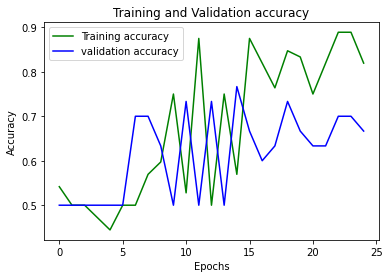

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Now we will random forest to classify Spiral Images**

In [ ]:
X_rf=spiral_extractor.predict(spiral_train_data)
X_rf.shape

(72, 53824)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
RF_model.fit(X_rf,spiral_train_labels)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
xtest_features=spiral_extractor.predict(spiral_test_data)
prediction=RF_model.predict(xtest_features)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
score1=accuracy_score(spiral_test_labels,prediction)
score1
ans.update({'CNN+RF':score1})
print(classification_report(spiral_test_labels, prediction))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.79      0.73      0.76        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



### **Comparison of both Models**

In [ ]:
for i in ans:
  print(i,'\t\t',ans[i])

Model 		 Accuracy
CNN 		 0.6666666666666666
CNN+RF 		 0.7666666666666667


### **Wave Model**

In [ ]:
wave_extractor = Sequential([
Conv2D(32, (3,3), activation = 'relu', input_shape = (128,128,3)),
Conv2D(32, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64,(3,3), activation = 'relu'),
Conv2D(64, (3,3), activation = 'relu'),
MaxPooling2D(pool_size=(2,2)),
Flatten()
])

In [ ]:
x1 = wave_extractor.output  
x1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(x1)
prediction_layer1 = Dense(2, activation = 'softmax')(x1)

In [ ]:
cnn_model1 = Model(inputs=wave_extractor.input, outputs=prediction_layer1)
cnn_model1.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history1 = cnn_model1.fit(wave_train_data, wave_train_labels_one_hot, epochs=25, validation_data = (wave_test_data,wave_test_labels_one_hot))

Epoch 1/25
3/3 [==============================] - 6s 2s/step - loss: 1.2869 - accuracy: 0.4722 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 2/25
3/3 [==============================] - 5s 1s/step - loss: 0.7174 - accuracy: 0.4444 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 3/25
3/3 [==============================] - 5s 1s/step - loss: 0.6974 - accuracy: 0.5000 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 4/25
3/3 [==============================] - 5s 1s/step - loss: 0.7011 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 5/25
3/3 [==============================] - 5s 1s/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 5s 1s/step - loss: 0.6909 - accuracy: 0.6389 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 7/25
3/3 [==============================] - 5s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 8/25
3/3 [=========================

In [ ]:
prediction_NN1 = cnn_model1.predict(wave_test_data)
prediction_NN1 = np.argmax(prediction_NN1, axis=-1)
prediction_NN1

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
ans1={}
ans1.update({'Model':'Accuracy'})

sc=accuracy_score(wave_test_labels,prediction_NN1)
sc

ans1.update({'CNN':sc})
print(classification_report(wave_test_labels, prediction_NN1))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.60      0.80      0.69        15

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.62        30
weighted avg       0.65      0.63      0.62        30



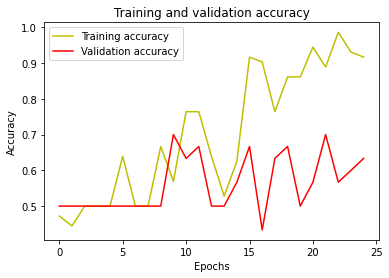

In [ ]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, acc1, 'y', label='Training accuracy')
plt.plot(epochs, val_acc1, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Now we will random forest to classify Wave Images**

In [ ]:
X_rf=wave_extractor.predict(wave_train_data)
X_rf.shape

(72, 53824)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
RF_model.fit(X_rf,wave_train_labels)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
xtest_features=wave_extractor.predict(wave_test_data)
prediction=RF_model.predict(xtest_features)
prediction

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
score1=accuracy_score(wave_test_labels,prediction)
score1
ans.update({'CNN+RF':score1})
print(classification_report(wave_test_labels, prediction))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.69      0.73      0.71        15

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



### **Comparison Of models**

In [ ]:
for i in ans:
  print(i,'\t\t',ans[i])

Model 		 Accuracy
CNN 		 0.6666666666666666
CNN+RF 		 0.7
